### 1) 패키지 참조

In [1]:
import sys
sys.path.append('../../')
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

from tensorflow.keras.models import Sequential # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense      # 모델 객체에 학습층을 쌓기 위한 클래스
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

### 2) 데이터셋 준비

In [2]:
origin = read_excel('https://data.hossam.kr/G03/pima-indians.xlsx')
origin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 3) 데이터 전처리
- 결측치 확인

In [3]:
origin.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- 데이터 종류 및 타입 확인

In [4]:
for column in origin.columns:
    print(origin[column].dtypes)
    print(origin[column].value_counts())

int64
Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
int64
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64
int64
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64
int64
SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     

### 4) 탐색적 데이터 분석
- 기본 통계 확인, 박스플롯 확인

In [5]:
origin.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

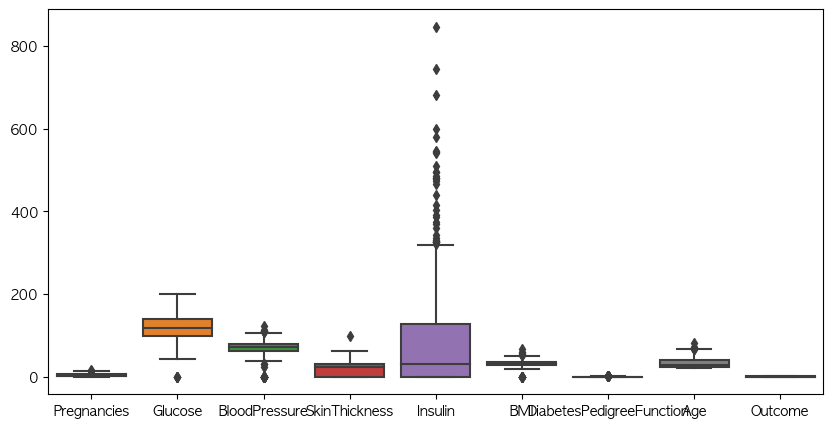

In [6]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (10, 5))
sb.boxplot(data = origin)
plt.show()
plt.close()

> 데이터의 분포가 상이하고 극단치가 유난히 많은 insulin 확인해봐야할 필요성 확인

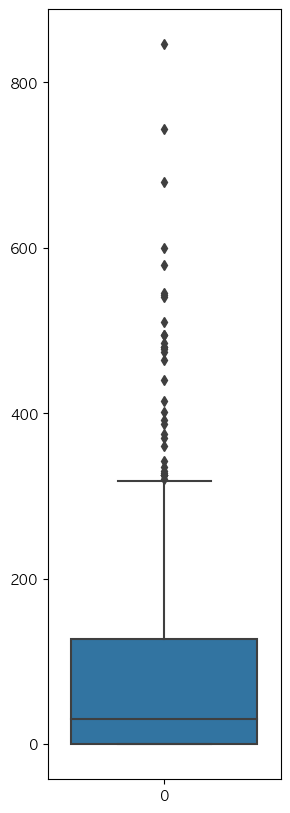

In [7]:
plt.figure(figsize = (3, 10))
sb.boxplot(data = origin['Insulin'])
plt.show()
plt.close()

> 다 실제 수치로 간주하고 제거하지 않기로 함
>
> 변수 간에 평균 값의 차이가 많이 나고, 각 변수 간 데이터의 분포가 상이하므로 표준화 실행

- 산점도 행렬 그래프와 추세선 확인

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

<Figure size 3000x3000 with 0 Axes>

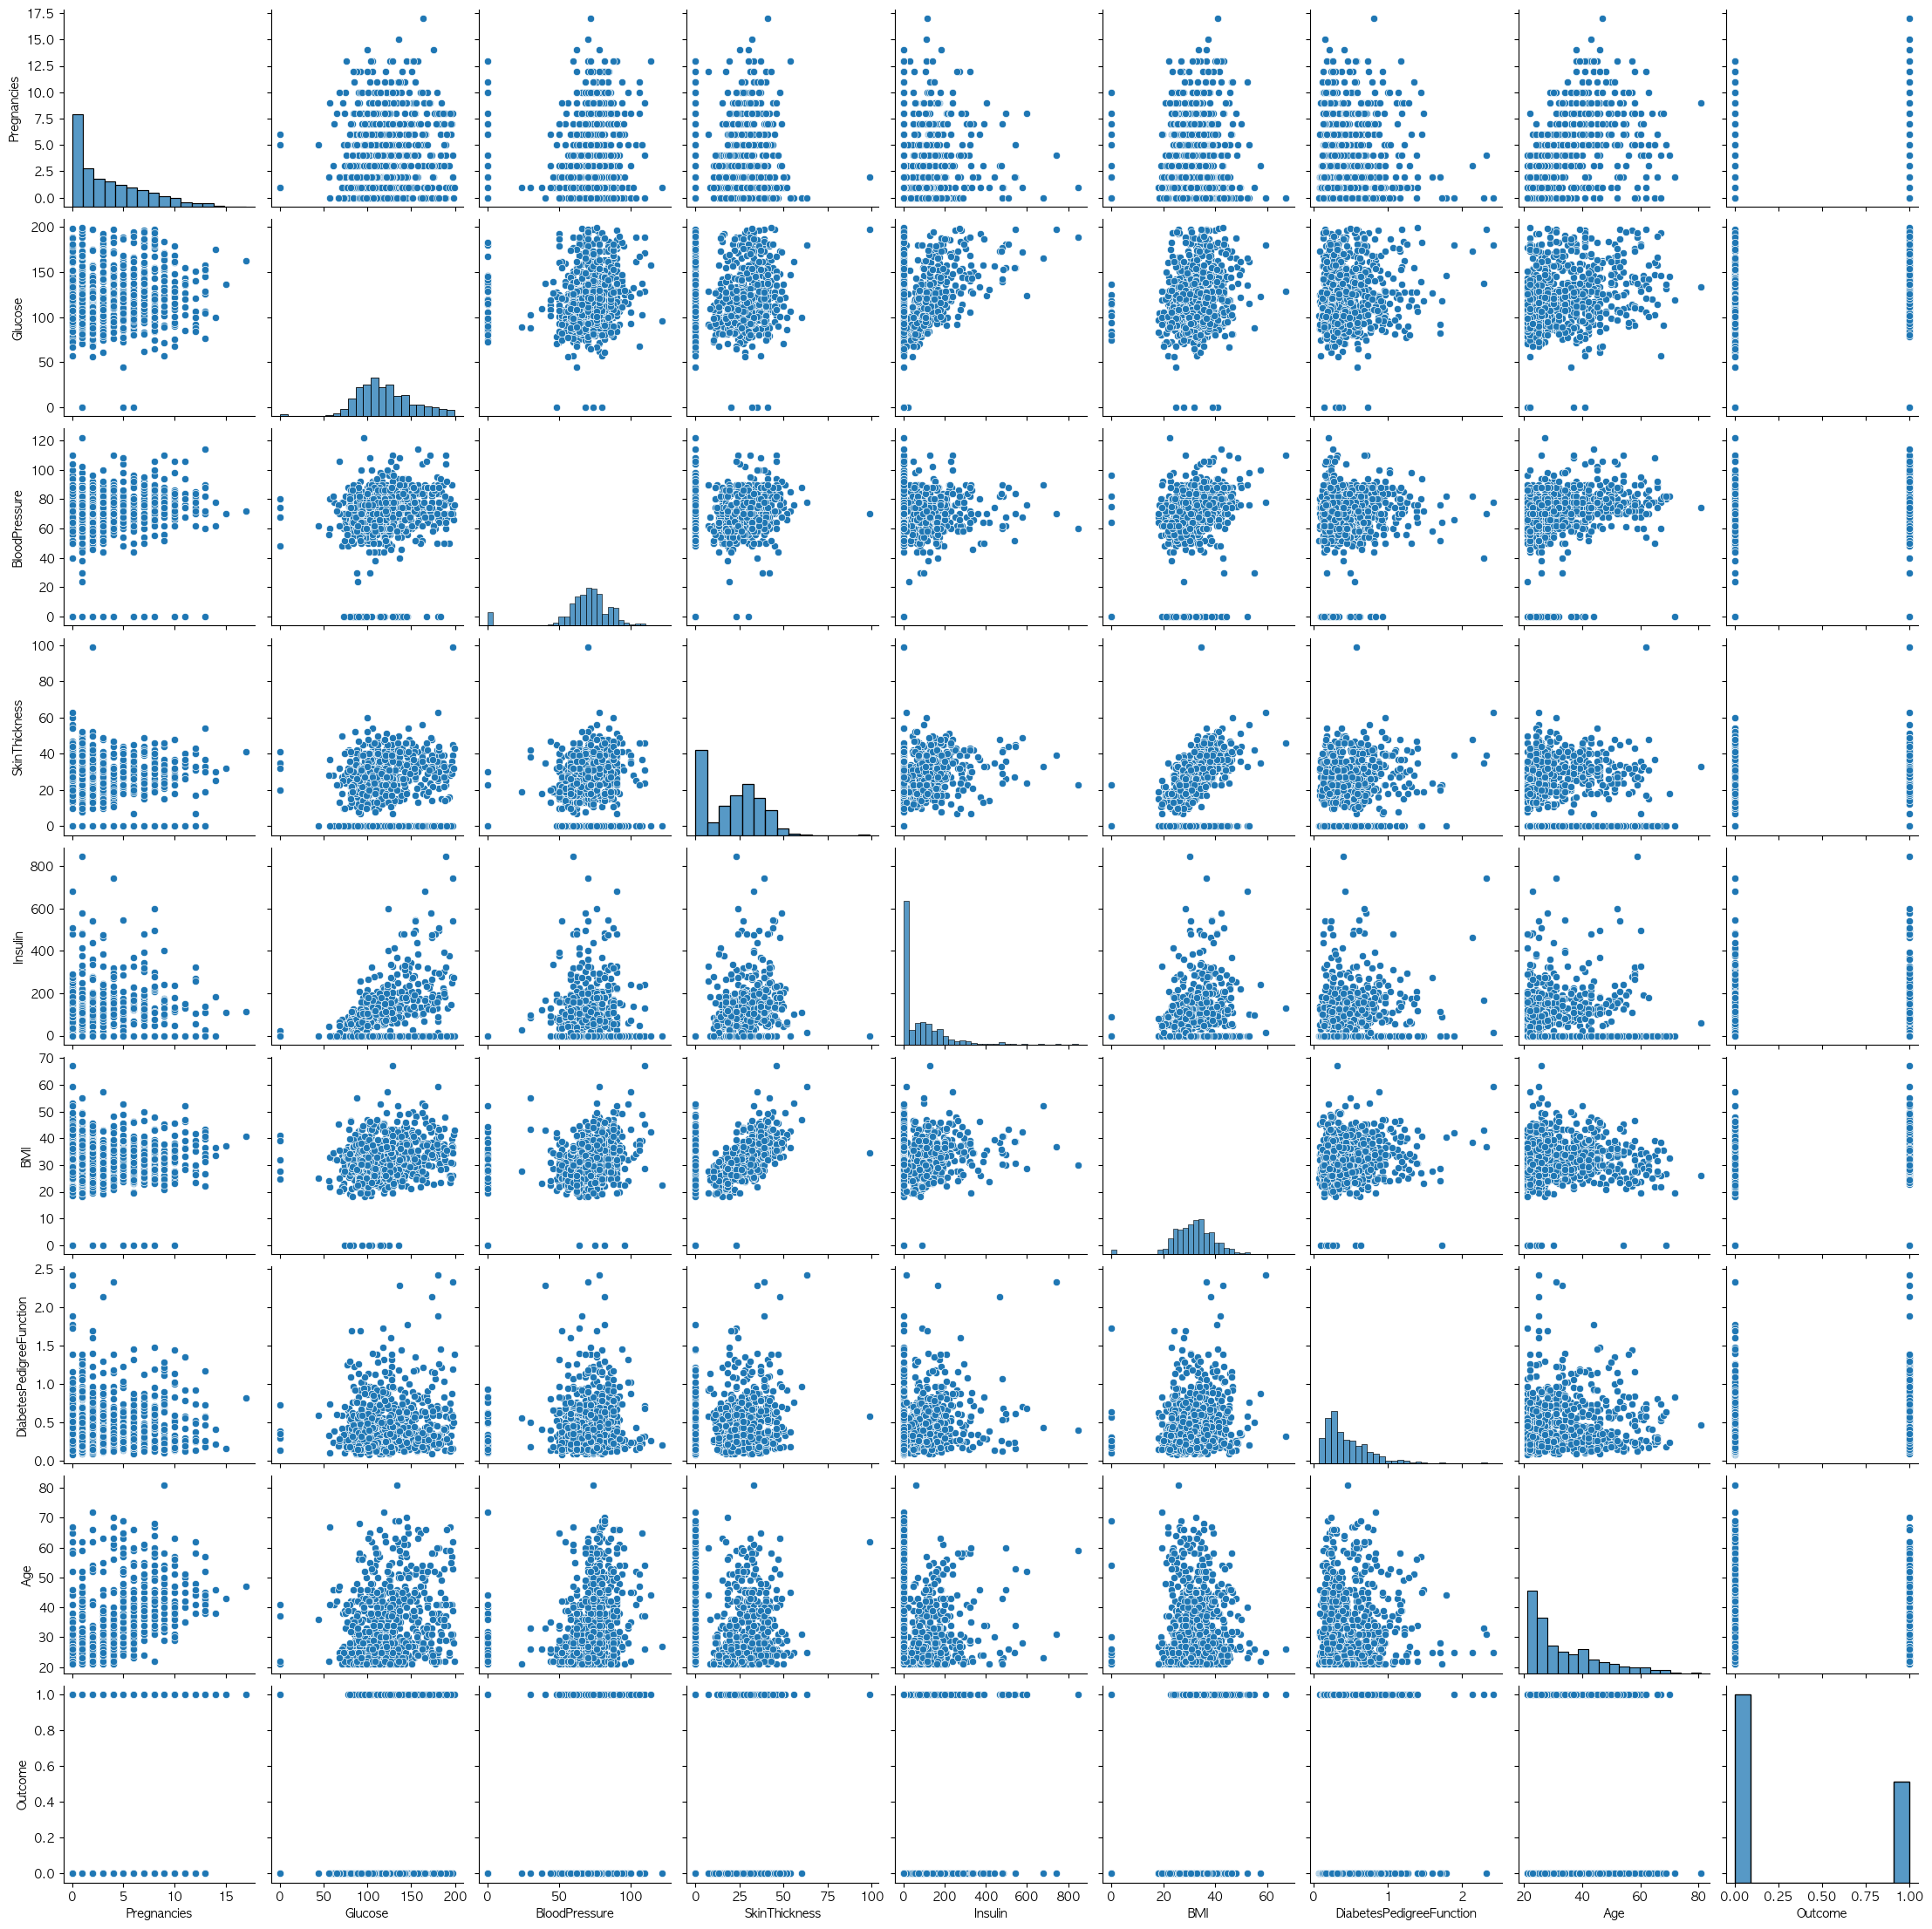

In [8]:
plt.figure(figsize = (30, 30))
sb.pairplot(origin)
plt.show()
plt.close()

> 다중공선성은 없는 것으로 확인
### 5) 데이터셋 분할
- 랜덤시드 고정

In [9]:
np.random.seed(777)

- 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [10]:
x = origin.drop('Outcome', axis=1)
x.head()
y = origin[['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


- 데이터 표준화 및 데이터프레임으로 재구성
    - ** 다항식 변환 시 표준화 후 다항식으로 변환하는 것이 훨씬 결과가 좋다

In [11]:
x_scaler = StandardScaler()
x_scale = x_scaler.fit_transform(x)
x_scale_df = DataFrame(x_scale, columns=x.columns)
x_scale_df

# y는 이미 0, 1로 되어있으므로 표준화할 필요 없음
x_scale.shape, y.shape

((768, 8), (768, 1))

- 표준화 전/후 상자그림 비교 (표준화가 잘 되었는지 확인)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

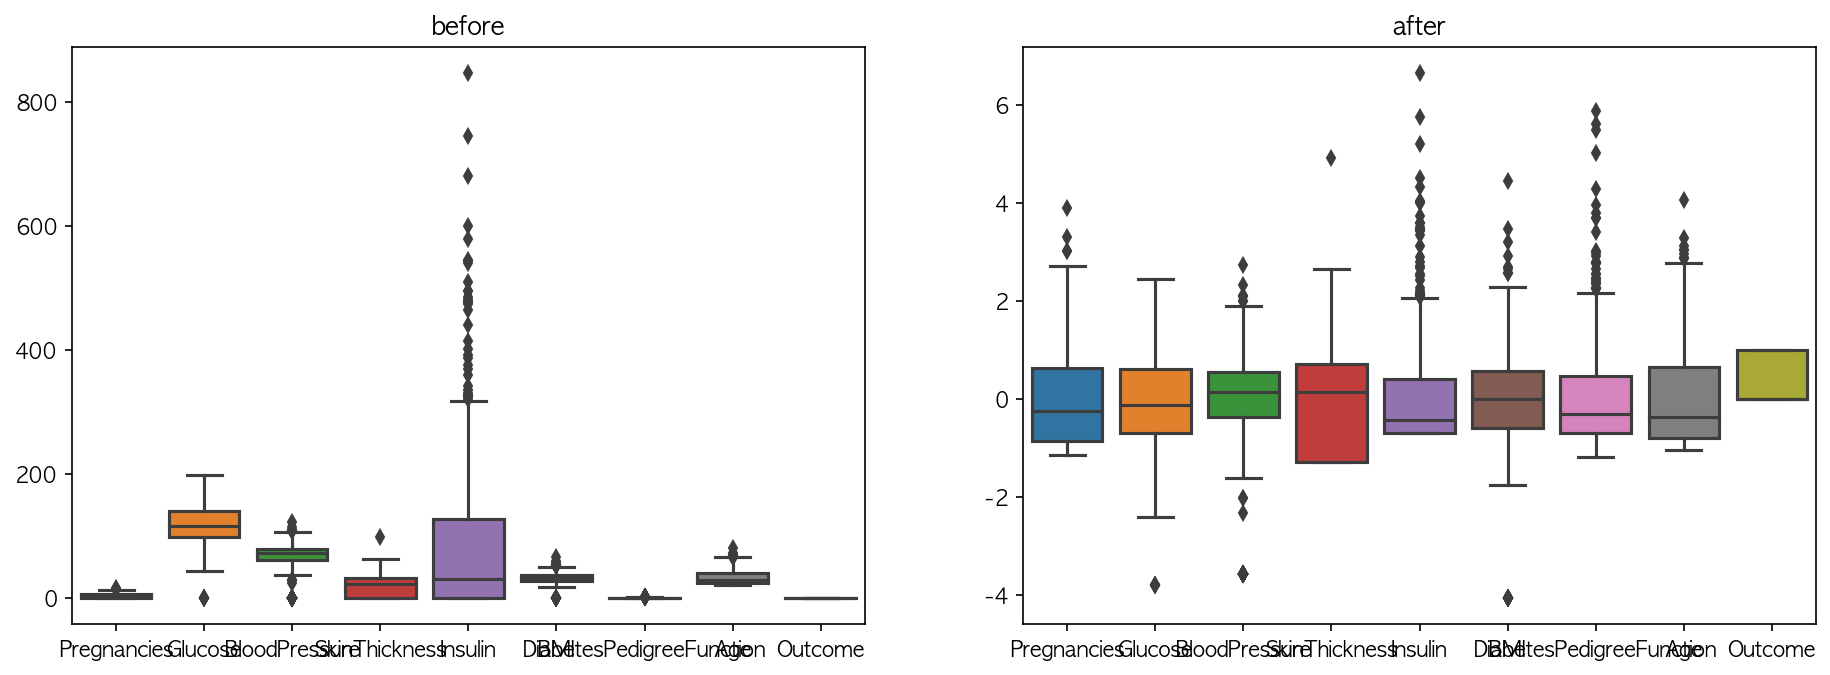

In [12]:
# 임시로 독립변수와 종속변수를 하나의 DataFrame으로 병합
tmp = merge(x_scale_df, y, left_index=True, right_index=True)

fig, ax = plt.subplots(1, 2, figsize = (15, 5), dpi=150)
sb.boxplot(data=origin, ax=ax[0])
sb.boxplot(data=tmp, ax=ax[1])
ax[0].set_title('before')
ax[1].set_title('after')
plt.show()
plt.close()

- 훈련 데이터와 검증 데이터 분할

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_scale_df,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537, 1), (231, 1))

### 6) 모델 개발
- 모델 정의
    - 데이터가 `단순하고 개수가 적다`면 `과(대)적합이 발생할 확률이 높고`, 또한 `Dense 층을 많이 쌓을수록` `과적합이 발생할 확률이 높`기 때문에 또한 주의하면서 적절한 크기와 모델층을 쌓아야 한다

In [14]:
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(len(x_train.iloc[0]),)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 학습하기

In [15]:
result = model.fit(x_train,
                      y_train,
                      epochs=500,
                      validation_data = (x_test, y_test),
                      callbacks=[EarlyStopping(monitor='val_loss',
                                               patience=10,
                                               verbose=1),
                                 ReduceLROnPlateau(monitor='val_loss',
                                                   patience=5,
                                                   factor=0.5,
                                                   min_lr=0.001,
                                                   verbose=1
                                                   )])

Epoch 1/500
17/17 [==============================] - 0s 6ms/step - loss: 0.6787 - acc: 0.5549 - val_loss: 0.6686 - val_acc: 0.6320 - lr: 0.0010
Epoch 2/500
17/17 [==============================] - 0s 1ms/step - loss: 0.6300 - acc: 0.6872 - val_loss: 0.6265 - val_acc: 0.6883 - lr: 0.0010
Epoch 3/500
17/17 [==============================] - 0s 1ms/step - loss: 0.5968 - acc: 0.7467 - val_loss: 0.5936 - val_acc: 0.7316 - lr: 0.0010
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5700 - acc: 0.7598 - val_loss: 0.5666 - val_acc: 0.7359 - lr: 0.0010
Epoch 5/500
17/17 [==============================] - 0s 1ms/step - loss: 0.5483 - acc: 0.7691 - val_loss: 0.5463 - val_acc: 0.7446 - lr: 0.0010
Epoch 6/500
17/17 [==============================] - 0s 1ms/step - loss: 0.5304 - acc: 0.7728 - val_loss: 0.5290 - val_acc: 0.7662 - lr: 0.0010
Epoch 7/500
17/17 [==============================] - 0s 1ms/step - loss: 0.5146 - acc: 0.7728 - val_loss: 0.5157 - val_acc: 0.7749 - lr:

### 7) 학습 결과 평가
- 학습결과 확인

In [16]:
result_df = DataFrame(result.history)
result_df['epochs']=result_df.index+1
result_df.set_index(keys='epochs', inplace=True)
result_df

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,0.678749,0.554935,0.668635,0.632035,0.001
2,0.630004,0.687151,0.626495,0.688312,0.001
3,0.596833,0.746741,0.593638,0.731602,0.001
4,0.570035,0.759777,0.566626,0.735931,0.001
5,0.548340,0.769088,0.546262,0.744589,0.001
6,0.530384,0.772812,0.529037,0.766234,0.001
7,0.514576,0.772812,0.515653,0.774892,0.001
8,0.501875,0.772812,0.505031,0.783550,0.001
9,0.491304,0.772812,0.495674,0.792208,0.001


- 학습 결과 시각화

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

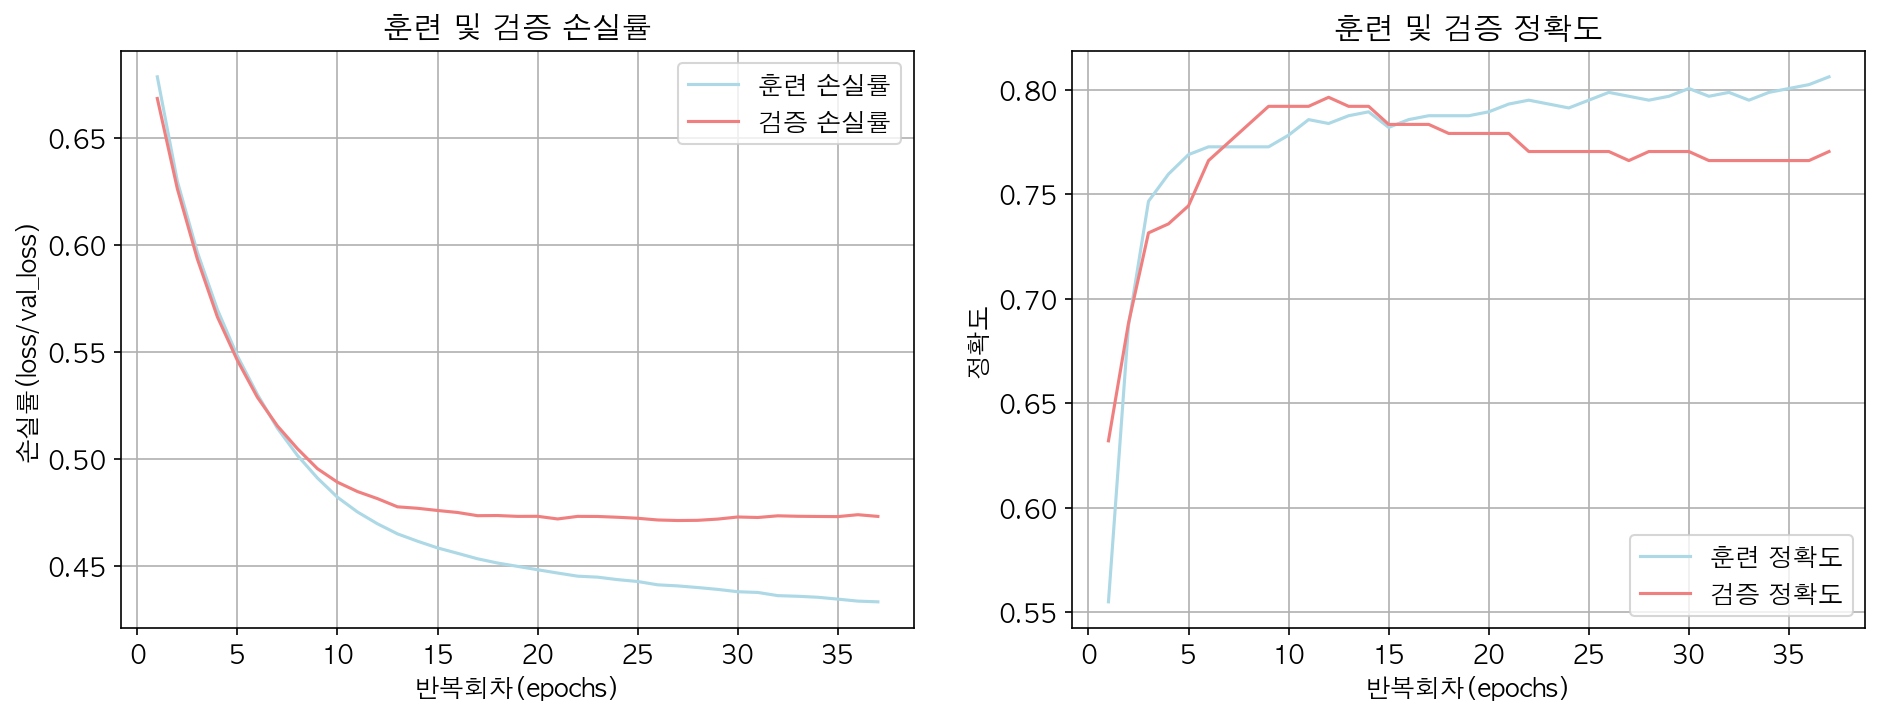

In [17]:
# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
sb.lineplot(x=result_df.index,
            y='loss',
            data= result_df,
            color='lightblue',
            label='훈련 손실률',
            ax=ax1)
sb.lineplot(x=result_df.index,
            y='val_loss',
            data= result_df,
            color='lightcoral',
            label='검증 손실률',
            ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차(epochs)')
ax1.set_ylabel('손실률(loss/val_loss)')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 평균절대오차 그리기
sb.lineplot(x=result_df.index,
            y='acc',
            data=result_df,
            color='lightblue',
            label='훈련 정확도',
            ax=ax2)
sb.lineplot(x=result_df.index,
            y='val_acc',
            data=result_df,
            color='lightcoral',
            label='검증 정확도',
            ax=ax2)
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('반복회차(epochs)')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

- 모델 성능 평가

In [18]:
evaluate1 = model.evaluate(x_train, y_train)
print('최종 훈련 손실률: %f, 최종 훈련 정확도: %f' % (evaluate1[0], evaluate1[1]))
evaluate2 = model.evaluate(x_test, y_test)
print('최종 검증 손실률: %f, 최종 검증 정확도: %f' % (evaluate2[0], evaluate2[1]))

17/17 [==============================] - 0s 401us/step - loss: 0.4309 - acc: 0.8026
최종 훈련 손실률: 0.430864, 최종 훈련 정확도: 0.802607
8/8 [==============================] - 0s 494us/step - loss: 0.4734 - acc: 0.7706
최종 검증 손실률: 0.473374, 최종 검증 정확도: 0.770563


### 8) 학습 결과 적용

> 직접 계산 (다윤 추가)

- 혼돈행렬 및 이진분류 평가
    - 각 항목의 의미:
        |구분|설명|
        |--|--|
        |TN(True Negative, Negative Negative)|실제는 Negative인데, Negative로 예측함.|
        |FP(False Positive, Negative Positive)|실제는 Negative인데, Positive로 예측함. (Type1 Error)|
        |FN(False Negative, Positive Negative)|실제는 Positive인데, Negative로 예측함. (Type2 Error)|
        |TP(True Positive, Positive Positive)|실제는 Positive인데, Positive로 예측함.|
- 이진분류 평가
    - scikitlearn 함수 활용 및 직접 계산
    - 정확도 -> 높을수록 좋음
    - 정밀도 -> 높을수록 좋음
    - 재현율 -> 높을수록 좋음
    - F1 score -> 높을수록 좋음
    - 위양성율 -> ***** 낮을수록 좋음
    - 특이성
- 오즈비 계산
    - 오즈비는 성공할 확률을 실패할 확률로 나눈 값이고 이 분석에서는 당뇨병여부가 종속변수이므로 당뇨병 있을 확률을 당뇨병 없을 확률로 나눈 값이다.
    - 오즈비(Odds Rate) 구하기
        - 계수값들만 추출하기
        - 독립변수의 `coef` : logit함수 계수. 해당 독립함수의 오즈에 $log$를 씌운 값 (자연로그)
    - $\text{Odds Rate} = \frac{생존확률}{사망확률}$
    - `계수값`에 대해 `numpy.exp()` 함수를 적용하면 각각의 회귀계수들을 오즈값으로 변환할 수 있다.
        - `odds_rate = numpy.exp(coef)`
    > 해당 독립변수가 종속변수에 미치는 영향을 더 직관적으로 확인할 수 있다.

In [19]:
# 예측값 생성
pred_bool = model.predict(x_train).flatten() > 0.5
pred = pred_bool.astype(int)
pred

# 혼동행렬
cm = confusion_matrix(y_train, pred)
tn, fp, fn, tp = cm.ravel()
cmdf = DataFrame([[tn, fn], [fp, tp]], 
                 index=['Actual(0)', 'Actual(1)'], 
                 columns=['Predicted(0)', 'Predicted(1)'])
print(cmdf)

# RAS
ras = roc_auc_score(y_train, pred)
ras

# 위양성율, 재현율, 임계값(사용안함)
fpr, tpr, thresholds = roc_curve(y_train, pred)
fpr 
tpr 
# 위양성율은 또한 
# fallout = fp / (fp + tn)
# 로도 됨

# 정확도
acc = accuracy_score(y_train, pred)
acc

# 정밀도
pre = precision_score(y_train, pred)
pre

# 재현율
recall = recall_score(y_train, pred)
recall

# F1 score
f1 = f1_score(y_train, pred)
f1

# 특이성
spe = 1 - fpr
spe

# 결과표 생성
result_df = DataFrame({'정확도(Accuracy)': [acc],
                       '정밀도(Precision)': [pre],
                       '재현율(Recall, TPR)': [recall],
                       '위양성율(Fallout, FPR)': [fpr[1]],
                       '특이성(Specificity, TNR)': [spe[1]],
                       'RAS': [ras],
                       'f1_score': [f1]})
result_df

# 모델 가중치와 편향 얻기
weights, bias = model.layers[1].get_weights()
weights # 계수 또는 가중치
bias # 편향

# 오즈비 계산
odds_ratio = np.exp(weights)[0]
odds_ratio

result_df['오즈비'] = odds_ratio
result_df.T

17/17 [==============================] - 0s 348us/step
           Predicted(0)  Predicted(1)
Actual(0)           306            71
Actual(1)            35           125


,0
정확도(Accuracy),0.802607
정밀도(Precision),0.781250
"재현율(Recall, TPR)",0.637755
"위양성율(Fallout, FPR)",0.102639
"특이성(Specificity, TNR)",0.897361
RAS,0.767558
f1_score,0.702247
오즈비,0.725568
